# Imports

In [90]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 40)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import feather
import os

In [139]:
from fastai.imports import *
from fastai.text import *

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [91]:
DATA_DIR = Path('data/')

In [104]:
!ls {DATA_DIR}

test_values.csv  train_labels.csv  train_values.csv


In [4]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv',
                           index_col=0,
                           parse_dates=['timestamp'])

train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv',
                           index_col=0)

# Benchmark Notebook

In [6]:
train_values.describe()

,process_id,object_id,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_acid,tank_lsh_pre_rinse
count,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5987820.0,5987820.0
mean,2.402626e+04,5.774687e+02,2.063859e+04,9.900358e-01,5.573105e+01,2.850323e+01,3.122898e+00,2.026836e+04,5.311070e+01,4.234741e+01,4.409829e+01,4.275999e+01,2.857360e+01,8.239745e+01,7.256939e+01,4.525006e+01,4.440434e+01,0.0,0.0
std,2.315437e+03,3.485798e+02,1.726843e+04,1.362277e+00,2.470911e+01,2.075043e+01,7.136347e+00,1.751884e+04,3.906756e+00,3.030825e+00,2.447630e+00,6.556844e+00,1.881273e+00,2.319812e+00,4.160146e-01,1.160742e+00,1.196753e+00,0.0,0.0
min,2.000100e+04,1.020000e+02,-9.481482e+04,-1.145833e-01,0.000000e+00,0.000000e+00,-3.616898e-01,-1.251447e+03,0.000000e+00,0.000000e+00,2.778157e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.729962e+01,0.000000e+00,0.000000e+00,0.0,0.0
25%,2.203900e+04,2.170000e+02,3.770255e+03,1.041667e-02,2.916667e+01,1.671371e+00,3.291377e-01,3.602431e+03,5.067075e+01,4.086950e+01,4.269151e+01,4.067202e+01,2.715567e+01,8.226273e+01,7.238860e+01,4.513291e+01,4.428875e+01,0.0,0.0
50%,2.406300e+04,4.260000e+02,2.155671e+04,2.634549e-01,6.795790e+01,4.210025e+01,8.101852e-01,1.781684e+04,5.405147e+01,4.259277e+01,4.417264e+01,4.383880e+01,2.848669e+01,8.254485e+01,7.260200e+01,4.529131e+01,4.450996e+01,0.0,0.0
75%,2.601600e+04,9.340000e+02,3.140010e+04,1.768229e+00,7.739077e+01,4.445182e+01,1.851852e+00,3.301866e+04,5.617205e+01,4.412561e+01,4.564435e+01,4.717719e+01,2.986834e+01,8.280527e+01,7.282624e+01,4.545575e+01,4.474600e+01,0.0,0.0
max,2.798900e+04,9.770000e+02,1.031612e+05,6.194010e+00,9.697627e+01,7.356589e+01,1.009657e+02,1.031395e+05,5.834907e+01,5.135489e+01,5.244104e+01,5.063549e+01,3.778935e+01,8.352864e+01,7.399450e+01,6.146095e+01,6.524091e+01,0.0,0.0


In [8]:
final_phases = train_values[(train_values.target_time_period)]

In [9]:
final_phases.describe()

,process_id,object_id,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_acid,tank_lsh_pre_rinse
count,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.000000,777877.0,777877.0
mean,24028.365961,591.309306,12816.926363,0.665698,24.722798,1.650703,0.835478,15696.370413,54.177994,42.738353,44.123068,41.436943,28.589196,82.319544,72.557646,45.176558,44.256600,0.0,0.0
std,2298.746114,343.100689,16504.888452,1.297840,16.614125,4.583034,3.265165,16362.465288,3.575095,3.250819,2.488556,6.725257,1.886503,3.778536,0.453921,2.157474,2.036579,0.0,0.0
min,20001.000000,102.000000,-6235.532000,-0.114366,7.736545,0.000000,-0.162760,-1247.829800,0.000000,0.000000,27.781574,0.000000,0.000000,0.000000,67.299620,0.000000,0.000000,0.0,0.0
25%,22077.000000,305.000000,7.233796,-0.033854,13.075087,0.361647,0.144676,12.659143,52.083694,41.450195,42.731480,39.618780,27.162907,82.298900,72.370514,45.131115,44.198190,0.0,0.0
50%,24064.000000,429.000000,1307.870200,0.047960,16.970486,0.427400,0.260417,11527.777000,55.212856,42.990090,44.205547,42.515190,28.530094,82.562935,72.598380,45.287918,44.476376,0.0,0.0
75%,25983.000000,940.000000,27799.479000,0.521050,31.969760,0.695946,0.560619,28522.857000,56.947880,44.384224,45.689020,45.792460,29.900896,82.812500,72.837100,45.448578,44.713913,0.0,0.0
max,27989.000000,977.000000,103135.850000,6.194010,81.626160,67.396850,81.202980,103132.234000,58.349068,51.028107,52.419888,50.456818,37.789352,83.528640,73.994500,58.859577,65.031250,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0aab295588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0aab295c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0aab295160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0aab28d2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0aab28d630>],
 'means': []}

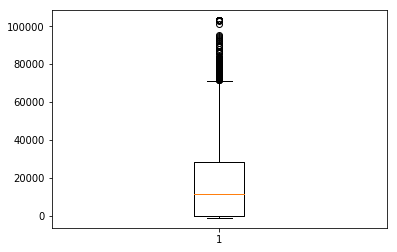

In [13]:
plt.boxplot(final_phases.return_flow)

## Example for Process ID 20017

In [14]:
final_phases_20017 = final_phases[final_phases.process_id == 20017]

In [27]:
final_phases_20017.return_flow.describe()

count     139.000000
mean     2577.859604
std      1767.808048
min         3.616898
25%         3.616898
50%      3443.286900
75%      4021.990850
max      4578.993000
Name: return_flow, dtype: float64

In [28]:
final_phases_20017 = final_phases_20017.assign(target = np.maximum(final_phases_20017.return_flow, 0) * final_phases_20017.return_turbidity)

In [40]:
final_phases = final_phases.assign(target = np.maximum(final_phases.return_flow, 0) * final_phases.return_turbidity)

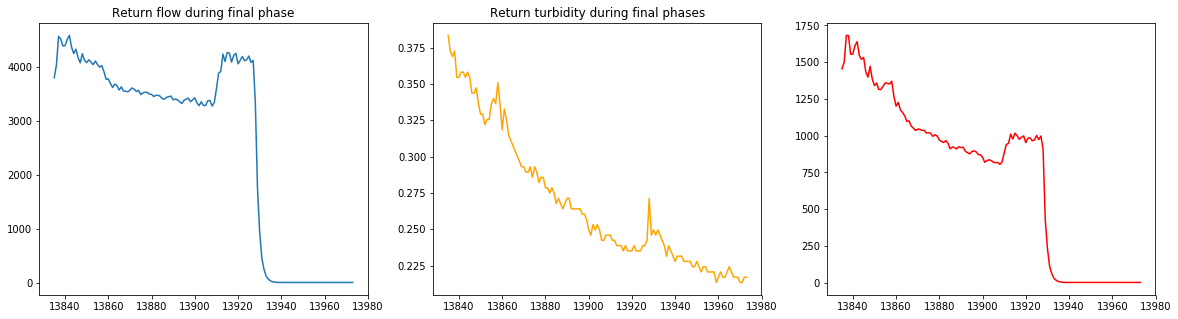

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

ax[0].plot(final_phases_20017.return_flow)
ax[0].set_title('Return flow during final phase')

ax[1].plot(final_phases_20017.return_turbidity, c='orange')
ax[1].set_title('Return turbidity during final phases')

ax[2].plot(final_phases_20017.target, c='red')
ax[2].set_title = ('Turbidity in the final phase, in NTU.L');

In [48]:
final_phases_20017.target.sum()

103724.28729467509

## Pre-Process Data

### Subset

In [49]:
train_values = train_values[train_values.phase != 'final_rinse']

Text(0.5, 1.0, 'Number of Processes with $N$ Phases')

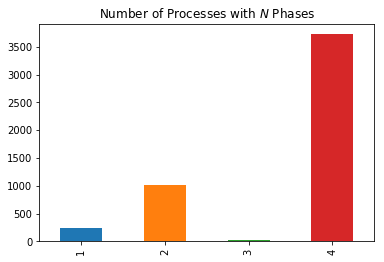

In [51]:
train_values.groupby('process_id').phase.nunique().value_counts().sort_index().plot.bar()
plt.title("Number of Processes with $N$ Phases")

In [54]:
train_values['process_phase'] = train_values.process_id.astype('str') + '_' + train_values.phase.astype('str')
process_phase = train_values.process_phase.unique()

In [ ]:
train_values.proce

In [55]:
rng = np.random.RandomState(2019)
to_keep = rng.choice(
                process_phases,
                size = np.int(len(process_phase) * 0.8),
                replace=False)

train_limited = train_values[train_values.process_phase.isin(to_keep)]

train_labels = train_labels.loc[train_limited.process_id.unique()]

Text(0.5, 1.0, 'Number of Processes with $N$ Phases (Subset for Training)')

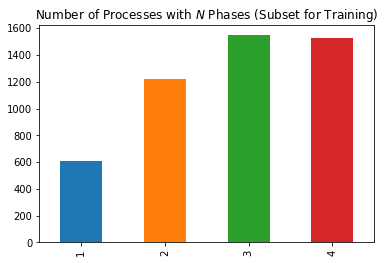

In [57]:
train_limited.groupby('process_id').phase.nunique().value_counts().sort_index().plot.bar()
plt.title("Number of Processes with $N$ Phases (Subset for Training)")

### Saving 

In [93]:
path = 'train_limited.feather'
feather.write_dataframe(train_limited, path)
train_limited = feather.read_dataframe(path)

In [69]:
os.makedirs('tmp', exist_ok=True)
train_limited.to_feather('tmp/ROR_train_limited')

In [92]:
train_limited = pd.read_feather('tmp/ROR_train_limited')

TypeError: read_feather() got an unexpected keyword argument 'nthreads'

### Feature Engineering

In [94]:
train_limited.head()

,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,process_phase
0,20001,405,pre_rinse,2018-04-15 04:20:47,L4,8550.348,0.615451,18.044704,4.990765,0.177228,15776.9100,True,True,False,False,False,False,False,False,True,True,55.499672,41.555992,44.026875,49.474102,32.385708,83.036750,73.03241,45.394646,44.340126,False,0.0,False,0.0,False,20001_pre_rinse
1,20001,405,pre_rinse,2018-04-15 04:20:49,L4,11364.294,0.654297,18.229168,3.749680,0.122975,13241.4640,True,True,False,False,False,False,False,False,True,True,55.487920,41.624170,44.045685,49.457645,32.385708,83.015045,73.03241,45.394447,44.339380,False,0.0,False,0.0,False,20001_pre_rinse
2,20001,405,pre_rinse,2018-04-15 04:20:51,L4,12174.479,0.699870,18.395544,2.783954,0.387008,10698.7850,True,True,False,False,False,False,False,False,True,True,55.476166,41.638275,44.045685,49.462350,32.385708,83.015045,73.03241,45.396280,44.336735,False,0.0,False,0.0,False,20001_pre_rinse
3,20001,405,pre_rinse,2018-04-15 04:20:53,L4,13436.776,0.761502,18.583622,1.769353,0.213397,8007.8125,True,True,False,False,False,False,False,False,True,True,55.471466,41.647675,44.048030,49.462350,32.385708,83.036750,73.03241,45.401875,44.333110,False,0.0,False,0.0,False,20001_pre_rinse
4,20001,405,pre_rinse,2018-04-15 04:20:55,L4,13776.766,0.837240,18.627026,0.904020,0.148293,6004.0510,True,True,False,False,False,False,False,False,True,True,55.459705,41.654730,44.048030,49.462350,32.385708,83.015045,73.03241,45.398197,44.334373,False,0.0,False,0.0,False,20001_pre_rinse


In [75]:
pd.get_dummies(train_limited[['process_id', 'pipeline']].drop_duplicates().set_index('process_id'))

,pipeline_L1,pipeline_L10,pipeline_L11,pipeline_L12,pipeline_L2,pipeline_L3,pipeline_L4,pipeline_L6,pipeline_L7,pipeline_L8,pipeline_L9
process_id,,,,,,,,,,,
20001,0,0,0,0,0,0,1,0,0,0,0
20002,0,0,0,0,0,1,0,0,0,0,0
20003,0,0,0,0,0,1,0,0,0,0,0
20004,0,0,0,0,0,0,0,0,1,0,0
20005,0,0,0,0,0,0,0,0,1,0,0
20008,0,0,0,0,0,0,1,0,0,0,0
20011,0,0,0,0,0,0,1,0,0,0,0
20014,0,0,0,0,0,0,0,0,0,1,0
20016,1,0,0,0,0,0,0,0,0,0,0


In [76]:
train_limited.group_by('process_id')['phase'].apply(lambda x: x.nunique())

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [78]:
def prep_metadata(df):
    # select process_id and pipeline
    meta = df[['process_id', 'pipeline']].drop_duplicates().set_index('process_id') 
    
    # convert categorical pipeline data to dummy variables
    meta = pd.get_dummies(meta)
    
    # pipeline L12 not in test data
    if 'L12' not in meta.columns:
        meta['pipeline_L12'] = 0
    
    # calculate number of phases for each process_object
    meta['num_phases'] = df.groupby('process_id')['phase'].apply(lambda x: x.nunique())
    
    return meta

In [80]:
prep_metadata(train_limited.head(50000))

,pipeline_L1,pipeline_L10,pipeline_L11,pipeline_L2,pipeline_L3,pipeline_L4,pipeline_L6,pipeline_L7,pipeline_L8,pipeline_L12,num_phases
process_id,,,,,,,,,,,
20001,0,0,0,0,0,1,0,0,0,0,4
20002,0,0,0,0,1,0,0,0,0,0,2
20003,0,0,0,0,1,0,0,0,0,0,3
20004,0,0,0,0,0,0,0,1,0,0,2
20005,0,0,0,0,0,0,0,1,0,0,1
20008,0,0,0,0,0,1,0,0,0,0,3
20011,0,0,0,0,0,1,0,0,0,0,4
20014,0,0,0,0,0,0,0,0,1,0,3
20016,1,0,0,0,0,0,0,0,0,0,2


In [86]:
ts_cols = [
    'process_id',
    'supply_flow',
    'supply_pressure',
    'return_temperature',
    'return_conductivity',
    'return_turbidity',
    'return_flow',
    'tank_level_pre_rinse',
    'tank_level_caustic',
    'tank_level_acid',
    'tank_level_clean_water',
    'tank_temperature_pre_rinse',
    'tank_temperature_caustic',
    'tank_temperature_acid',
]

In [87]:
def prep_time_series_features(df, columns=None):
    if columns is None:
        columns = df.columns
    
    ts_df = df[ts_cols].set_index('process_id')
    
    ts_features = ts_df.groupby('process_id').agg(['min', 'max', 'mean', 'std', lambda x: x.tail(5).mean()])
    
    return ts_features

In [88]:
def create_feature_matrix(df):
    meta = prep_metadata(df)
    ts = prep_time_series_features(df)
    
    feature_matrix = pd.concat([meta, ts], axis=1)
    
    return feature_matrix

In [99]:
train_features = create_feature_matrix(train_limited)

### RandomForest

In [101]:
%%time
rf = RandomForestRegressor(n_estimators=10, random_state=2019)
rf.fit(train_features, np.ravel(train_labels))

CPU times: user 2.98 s, sys: 15.1 ms, total: 3 s
Wall time: 2.43 s


In [121]:
df_raw = train_values
df = train_features
y = np.ravel(train_labels)

In [117]:
rf.score(df,y)

0.8691190608915269

In [123]:
len(df)

4902

In [126]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1000  # ~20% of train_features
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((3902, 77), (3902,), (1000, 77))

In [132]:
def mape(x,y): return (np.abs(x-y)/np.maximum(np.abs(y), 290000)).mean()

def print_score(m):
    res = [mape(m.predict(X_train), y_train), mape(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [134]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.26 s, sys: 46.1 ms, total: 3.31 s
Wall time: 643 ms
[0.5366712922196739, 1.2990458552199275, 0.8492287249455246, 0.06430251942010834]


### Tuning RF

#### Single Tree

In [135]:
m = RandomForestRegressor(n_estimators = 1, max_depth=3, bootstrap=False,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[2.181873586146753, 2.0107976609472713, 0.36214616256394705, -0.018428680635188766]


In [142]:
m = RandomForestRegressor(n_estimators=1,bootstrap=False,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.0, 1.1173641950862219, 1.0, -1.1603712032065987]


What does it mean when the validation score improves, even though the number of estimators decreased AND the R^2 for the validation set declined???

#### Bagging

In [143]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5106086416267145, 1.1940774730475445, 0.8742694629763872, 0.2896612448294834]


In [144]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [150]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 197793.010038, 1606615.963296,  412671.285569,  895335.158051,  756339.093092, 1503135.979797,  415090.888083,
         632701.761581,  768542.892473, 1655463.825123]),
 884368.9857103347,
 1333337.024469531)

In [151]:
preds.shape

(10, 1000)

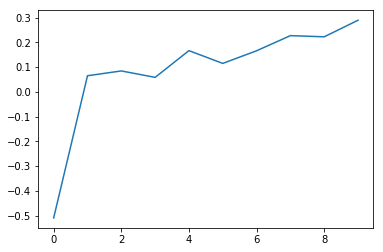

In [154]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [156]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5024757424765081, 1.2729412005072955, 0.8425554561502275, 0.21839329395167129]


In [161]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

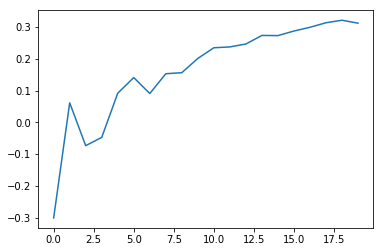

In [162]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [164]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5122028099637501, 1.3136458501217294, 0.9014962313826634, 0.26816659446919566]


In [165]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

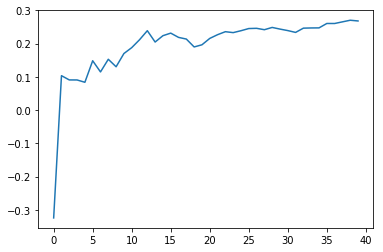

In [166]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1], axis=0)) for i in range(40)]);

In [167]:
m = RandomForestRegressor(n_estimators=100,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.49516718392416575, 1.2278035683343724, 0.8892290009318566, 0.31807868529463035]


In [168]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

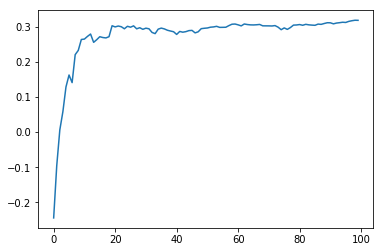

In [169]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1], axis=0)) for i in range(100)]);

Marginal Cost meets Marginal Revenue around 20 estimators

#### OOB_Score

In [170]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5180842627967567, 1.1961930193137058, 0.8678627454492421, 0.3307505662691719, 0.12092971649506667]


#### Overfitting

##### Parameters

In [173]:
m = RandomForestRegressor(n_estimators=20,oob_score=True,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5301606909408874, 1.1950987349413245, 0.866713692637147, 0.23606293703190118, 0.13129363120548332]


In [178]:
m = RandomForestRegressor(n_estimators=20,oob_score=True,min_samples_leaf=3,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.6527745403102915, 1.145405570775968, 0.7658597574493793, 0.30231808826356044, 0.23239281386622612]


In [186]:
m = RandomForestRegressor(n_estimators=20,min_samples_leaf=3,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.6410682855715671, 1.1919994866384191, 0.7437265386205606, 0.2994048697637346, 0.19305280662046465]


In [187]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

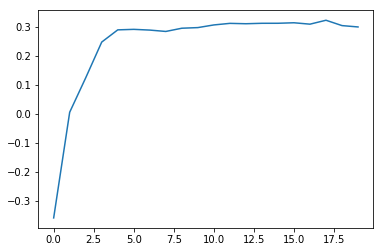

In [188]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1], axis=0)) for i in range(20)]);

# Test Values

In [190]:
!ls data

OSError: [Errno 12] Cannot allocate memory

In [191]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col=0, parse_dates=['timestamp'])

In [192]:
test_features = create_feature_matrix(test_values)

In [193]:
preds = m.predict(test_features)

# Submission 

In [194]:
submission_format = pd.read_csv(DATA_DIR / 'submission_format.csv', index_col=0)

In [195]:
assert np.all(test_features.index == submission_format.index)

In [196]:
my_submission = pd.DataFrame(data=preds,
                            columns=submission_format.columns,
                            index=submission_format.index)

In [197]:
my_submission.to_csv('submission.csv')

In [198]:
!head submission.csv

OSError: [Errno 12] Cannot allocate memory